# Pymaceuticals Inc.
---

Analysis

- Based on the graphs produced below, several trends can be observed in the data related to the Capomulin regimen:

### 1. **Mouse Weight vs. Tumor Volume (Scatter Plot and Correlation)**
   - **Trend**: The scatter plot shows a positive relationship between **mouse weight** and **average tumor volume** for mice treated with Capomulin. Heavier mice tend to have larger average tumor volumes.
   - **Correlation**: The calculated correlation coefficient of **0.84** indicates a strong positive correlation, suggesting that mouse weight is likely a significant factor influencing tumor size. This trend suggests that as the weight of the mouse increases, there is a corresponding increase in tumor volume.
   - **Regression Analysis**: The linear regression line added to the scatter plot confirms this positive trend, with the line showing an upward slope. The relationship is consistent across most of the data points, and the R-squared value further supports that the weight of the mouse accounts for a substantial portion of the variability in tumor volume.

### 2. **Tumor Volume Over Time (Capomulin Treatment Line Plot)**
   - **Trend**: In the line plot that shows tumor volume vs. time for a specific mouse (l509), we observe that the tumor volume initially increases over time and then begins to decrease, especially after a certain time point (around 25 days). 
   - **Analysis**: This suggests that Capomulin may initially allow for some tumor growth, but after a specific period, the treatment starts to reduce tumor volume. This downward trend after a peak is an encouraging sign of Capomulin's potential effectiveness in shrinking tumors over time.

### 3. **Tumor Volume Distribution Across Different Drug Regimens (Box Plot)**
   - **Trend**: The box plot shows the distribution of final tumor volumes for mice treated with different drugs (Capomulin, Ramicane, Infubinol, and Ceftamin). 
     - **Capomulin and Ramicane**: Both treatments have lower median tumor volumes and narrower interquartile ranges (IQRs) compared to Infubinol and Ceftamin. This suggests that these two drugs may be more effective in reducing tumor volume across the population of treated mice.
     - **Infubinol**: An outlier is visible, with a significantly smaller tumor volume compared to the others. However, the median tumor volume for Infubinol is relatively higher compared to Capomulin and Ramicane, suggesting that it may not be as effective overall.
     - **Ceftamin**: Similar to Infubinol, it has a larger range of tumor volumes and a higher median, indicating less effectiveness in tumor reduction compared to Capomulin and Ramicane.

### Overall Interpretation:
- **Effectiveness of Capomulin**: Capomulin appears to be one of the more effective drugs in reducing tumor volume, as indicated by both the scatter plot and the box plot. Tumor volume tends to decrease as time progresses, and Capomulin-treated mice generally exhibit lower tumor volumes compared to other treatments.
- **Weight-Tumor Volume Relationship**: The strong positive correlation between mouse weight and tumor volume suggests that mouse weight could be an important factor in understanding how tumors develop and respond to treatment.

These trends suggest that Capomulin shows promise in reducing tumor size over time, and further studies might explore whether mouse weight influences drug efficacy or the development of tumors.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice =combined_data['Mouse ID'].nunique()
print(f"Number of Unique Mice: {num_mice}")

Number of Unique Mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(f"Duplicate mice entries: {duplicate_mice['Mouse ID'].unique()}")

Duplicate mice entries: ['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice in the clean DataFrame: {num_mice_cleaned}")

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_Std_Err=('Tumor Volume (mm3)', st.sem)
)


summary_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = combined_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', st.sem]
})

summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

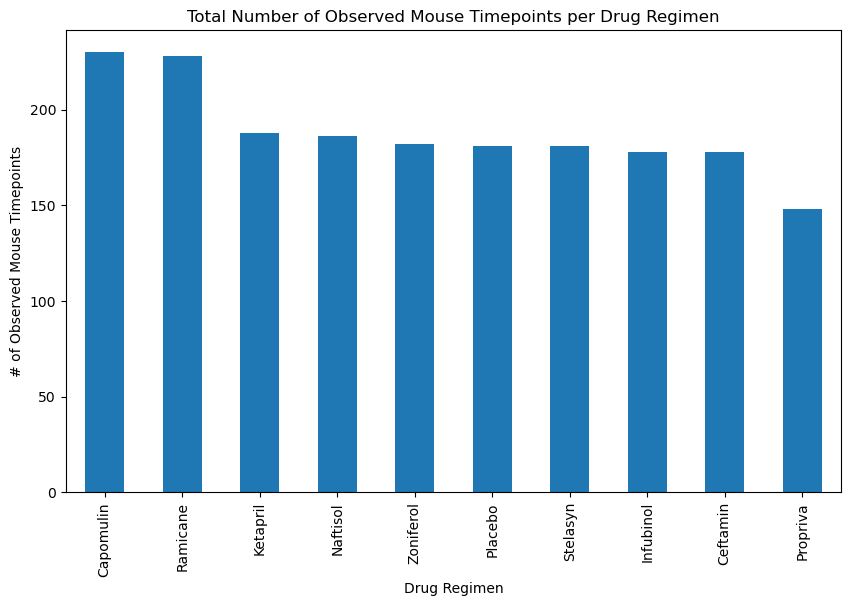

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_counts = cleaned_data['Drug Regimen'].value_counts()
mouse_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Total Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

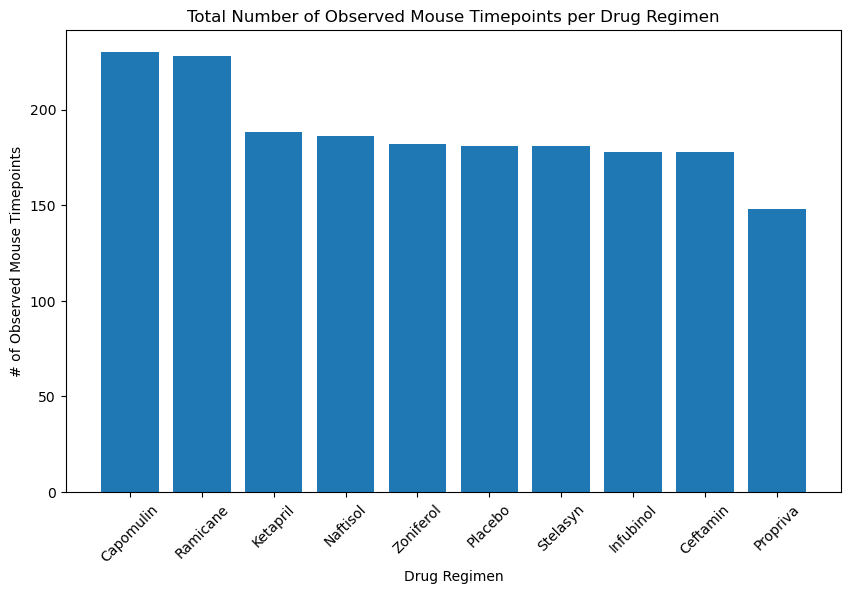

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_counts = cleaned_data['Drug Regimen'].value_counts()

# Plotting with Pyplot
plt.figure(figsize=(10, 6))
plt.bar(mouse_counts.index, mouse_counts.values)

# Add labels and title
plt.title("Total Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)

# Display the plot
plt.show()


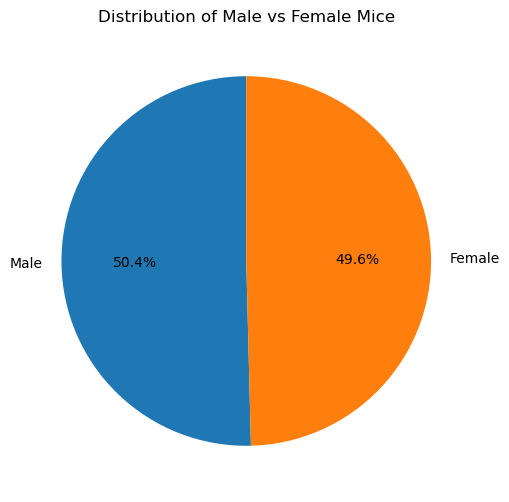

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6,6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["#1f77b4", "#ff7f0e"], labels=["Male", "Female"])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.title("Distribution of Male vs Female Mice")

# Display the pie chart
plt.show()

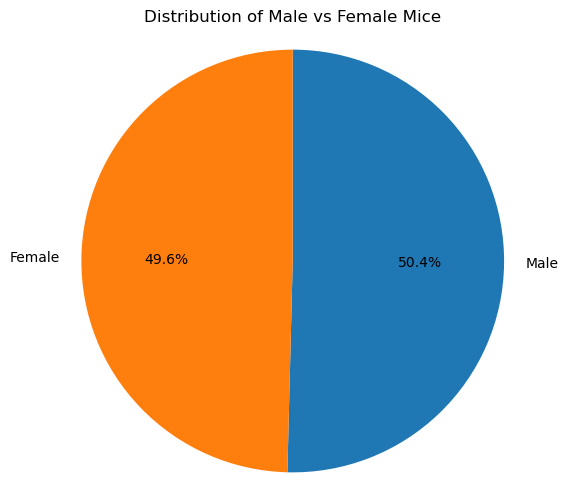

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()['Sex'].value_counts()

# Make the pie chart 
plt.figure(figsize=(6,6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=["#1f77b4", "#ff7f0e"], counterclock=False)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title("Distribution of Male vs Female Mice")

# Display the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Filter the data to include only the four regimens of interest
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]



In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(drug_data)
    
    # Calculate quartiles
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine potential outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Print the potential outliers for each drug
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


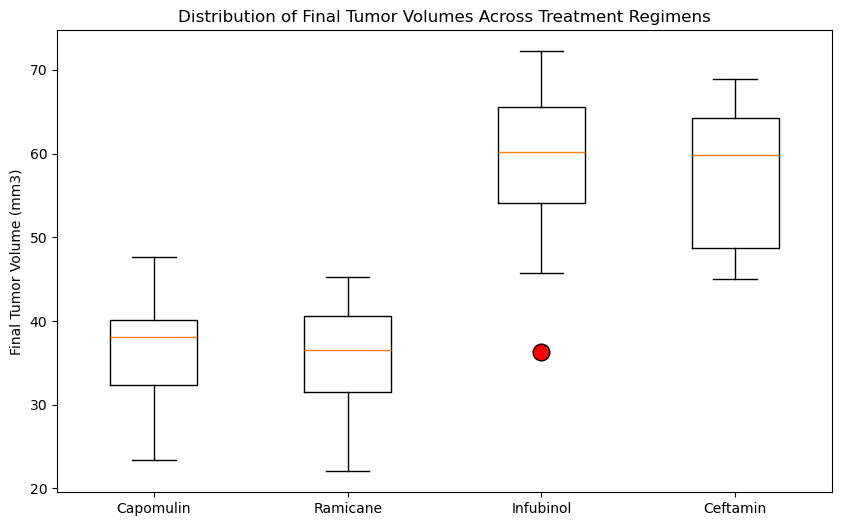

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'r'})

# Add labels
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volumes Across Treatment Regimens')

# Display the plot
plt.show()



## Line and Scatter Plots

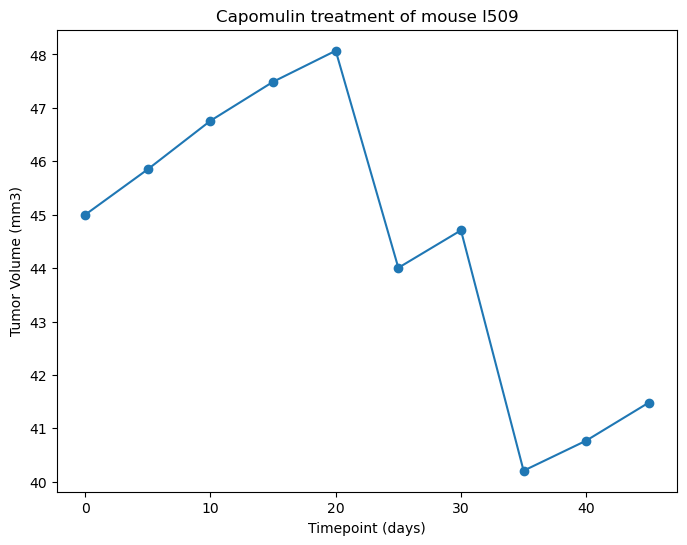

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for mouse l509 treated with Capomulin
mouse_data = cleaned_data.loc[cleaned_data['Mouse ID'] == 'l509']

# Create the line plot
plt.figure(figsize=(8,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()



          Weight (g)  Tumor Volume (mm3)
Mouse ID                                
b128            22.0           41.963636
b742            21.0           40.083699
f966            17.0           36.505973
g288            19.0           41.990097
g316            22.0           44.613344
i557            24.0           44.805810
i738            20.0           39.141053
j119            23.0           44.465236
j246            21.0           43.216925
l509            21.0           44.434474
l897            19.0           42.507261
m601            17.0           34.847470
m957            19.0           39.049816
r157            25.0           45.798970
r554            17.0           36.509212
r944            25.0           43.367364
s185            17.0           34.559143
s710            23.0           42.803733
t565            17.0           39.328725
u364            17.0           39.887495
v923            21.0           41.581595
w150            23.0           41.384825
w914            

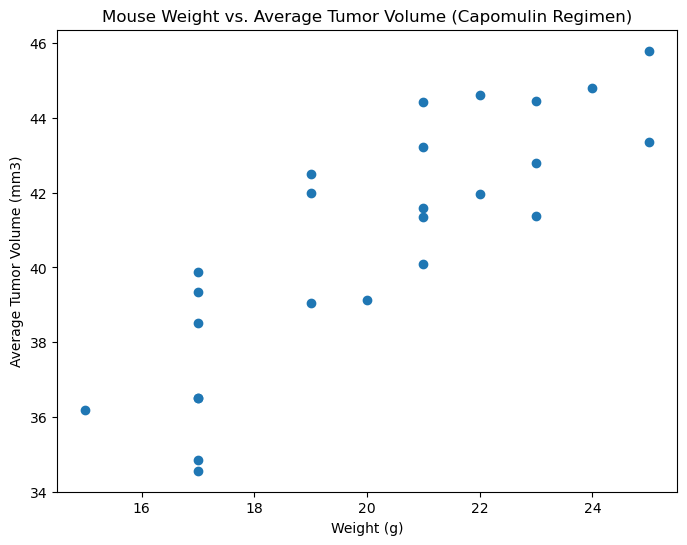

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Ensure that only the relevant numeric columns are included in the groupby mean operation
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Perform groupby only on 'Weight (g)' and 'Tumor Volume (mm3)' columns
avg_tumor_volume = capomulin_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Display the result
print(avg_tumor_volume)

# Generate a scatter plot
plt.figure(figsize=(8,6))

# Create the scatter plot
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()





## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


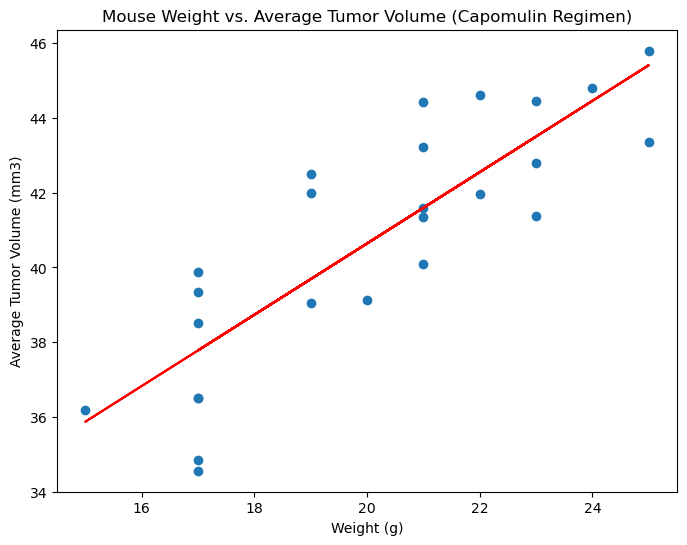

Slope: 0.95, Intercept: 21.55, R-squared: 0.71


In [29]:
# Calculate the correlation coefficient
correlation = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Perform linear regression
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Create a scatter plot with a regression line
plt.figure(figsize=(8,6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Plot the regression line
regress_values = avg_tumor_volume['Weight (g)'] * slope + intercept
plt.plot(avg_tumor_volume['Weight (g)'], regress_values, "r-")

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

# Print regression details
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r_value**2:.2f}")

